### Import Needed Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score


### EDA

In [2]:
df=pd.read_csv('/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv',encoding='ISO-8859-1')
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [4]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


### Data Preprocessing

**drop undeeded columns**

In [5]:
df.drop(columns=['gender','customer name','customer e-mail','country'],inplace=True)
df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


**define x,y** 

In [6]:
x=df.drop(columns='car purchase amount')
x

,age,annual Salary,credit card debt,net worth
0,41.851720,62812.09301,11609.380910,238961.2505
1,40.870623,66646.89292,9572.957136,530973.9078
2,43.152897,53798.55112,11160.355060,638467.1773
3,58.271369,79370.03798,14426.164850,548599.0524
4,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...
495,41.462515,71942.40291,6995.902524,541670.1016
496,37.642000,56039.49793,12301.456790,360419.0988
497,53.943497,68888.77805,10611.606860,764531.3203
498,59.160509,49811.99062,14013.034510,337826.6382


In [7]:
y=df['car purchase amount']
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64

**data scaling**

In [8]:
#we should making y into 2D array to make scaling (y.values.reshape(-1,1))
y.shape

(500,)

In [9]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y.values.reshape(-1,1))

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 4)
(100, 4)
(400, 1)
(100, 1)


## Linear_Regression_Models

In [11]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [12]:
lr_model.score(x_train,y_train)

0.9999999816626624

In [13]:
lr_pred=lr_model.predict(x_test)

**calculate Mean square error**

In [14]:
lr_mse=mean_squared_error(y_test,lr_pred)
lr_mse

4.942037654697138e-10

**calculate R^2**

In [15]:
lr_r2=r2_score(y_test,lr_pred)
lr_r2

0.9999999793157544

## Lasso

In [16]:
lasso=Lasso(alpha=0.0001)
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [17]:
lasso.score(x_train,y_train)

0.9999484840256792

In [18]:
lasso_pred=lasso.predict(x_test)

In [19]:
lasso_mse=mean_squared_error(y_test,lasso_pred)
lasso_mse

1.2407797129244328e-06

In [20]:
lasso_r2=r2_score(y_test,lasso_pred)
lasso_r2

0.999948068804387

## Ridge

In [21]:
ridge=Ridge(alpha=0.0001)
ridge.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [22]:
ridge.score(x_train,y_train)

0.9999999815590181

In [23]:
ridge_pred=ridge.predict(x_test)

In [24]:
ridge_mse=mean_squared_error(y_test,ridge_pred)
ridge_mse

4.885854645183052e-10

In [25]:
ridge_r2=r2_score(y_test,ridge_pred)
ridge_r2

0.9999999795509009

## Evaluations

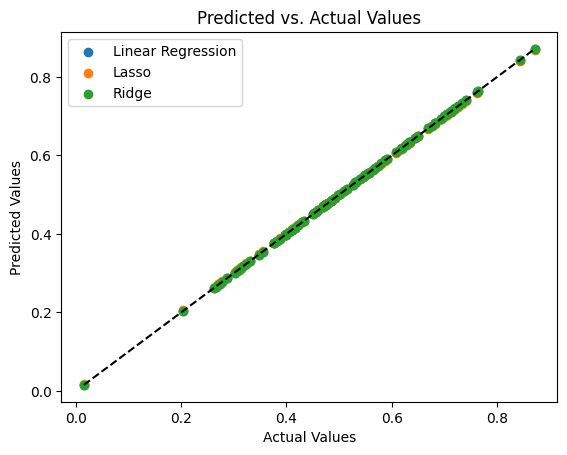

In [26]:
# Plot predicted vs. actual values
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.scatter(y_test,lr_pred,label='Linear Regression')
plt.scatter(y_test,lasso_pred,label='Lasso')
plt.scatter(y_test,ridge_pred,label='Ridge')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black')
plt.legend()
plt.show()

In [27]:
print(f'MSE\nLinear Regression: {lr_mse}\nRidge Regression: {ridge_mse}\nLasso Regression: {lasso_mse}')

MSE
Linear Regression: 4.942037654697138e-10
Ridge Regression: 4.885854645183052e-10
Lasso Regression: 1.2407797129244328e-06


In [28]:
print(f'R-2\nLinear Regression: {lr_r2}\nRidge Regression: {ridge_r2}\nLasso Regression: {lasso_r2}')

R-2
Linear Regression: 0.9999999793157544
Ridge Regression: 0.9999999795509009
Lasso Regression: 0.999948068804387
